In [220]:
# pandas for df structures and operations for manipulating numerical tables and time series
import pandas
from pandas.plotting import scatter_matrix


# matplotlib.pyplot for df plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from scipy.stats import zscore


# for numeric calculations
import numpy as np

# from utilities import visualize_classifier


In [221]:
df = pandas.read_csv("HR-Employee-Attrition.csv")

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [223]:
print(df.shape)

(1470, 35)


In [224]:
list(df)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [225]:
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [227]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [228]:
df[df.notnull()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [229]:
df = df.dropna()

In [230]:
object_cols = df.select_dtypes(include='object').columns

# Dictionary to store the mappings for reporting
mapping_report = {}

# Replace categorical values with numeric codes
for col in object_cols:
    unique_vals = df[col].unique()
    val_to_code = {val: code for code, val in enumerate(unique_vals)}
    df[col] = df[col].map(val_to_code)
    mapping_report[col] = val_to_code

for col in mapping_report:
    print(f"\nColumn: {col}")
    for k, v in mapping_report[col].items():
        print(f"  '{k}' → {v}")



Column: Attrition
  'Yes' → 0
  'No' → 1

Column: BusinessTravel
  'Travel_Rarely' → 0
  'Travel_Frequently' → 1
  'Non-Travel' → 2

Column: Department
  'Sales' → 0
  'Research & Development' → 1
  'Human Resources' → 2

Column: EducationField
  'Life Sciences' → 0
  'Other' → 1
  'Medical' → 2
  'Marketing' → 3
  'Technical Degree' → 4
  'Human Resources' → 5

Column: Gender
  'Female' → 0
  'Male' → 1

Column: JobRole
  'Sales Executive' → 0
  'Research Scientist' → 1
  'Laboratory Technician' → 2
  'Manufacturing Director' → 3
  'Healthcare Representative' → 4
  'Manager' → 5
  'Sales Representative' → 6
  'Research Director' → 7
  'Human Resources' → 8

Column: MaritalStatus
  'Single' → 0
  'Married' → 1
  'Divorced' → 2

Column: Over18
  'Y' → 0

Column: OverTime
  'Yes' → 0
  'No' → 1


Rows before outlier removal: 1470
Rows after outlier removal:  1074
Total rows removed:          396

Rows removed per column:
  MonthlyIncome: 114
  TotalWorkingYears: 61
  YearsAtCompany: 27
  YearsSinceLastPromotion: 141
  NumCompaniesWorked: 39
  DistanceFromHome: 0
  JobLevel: 14


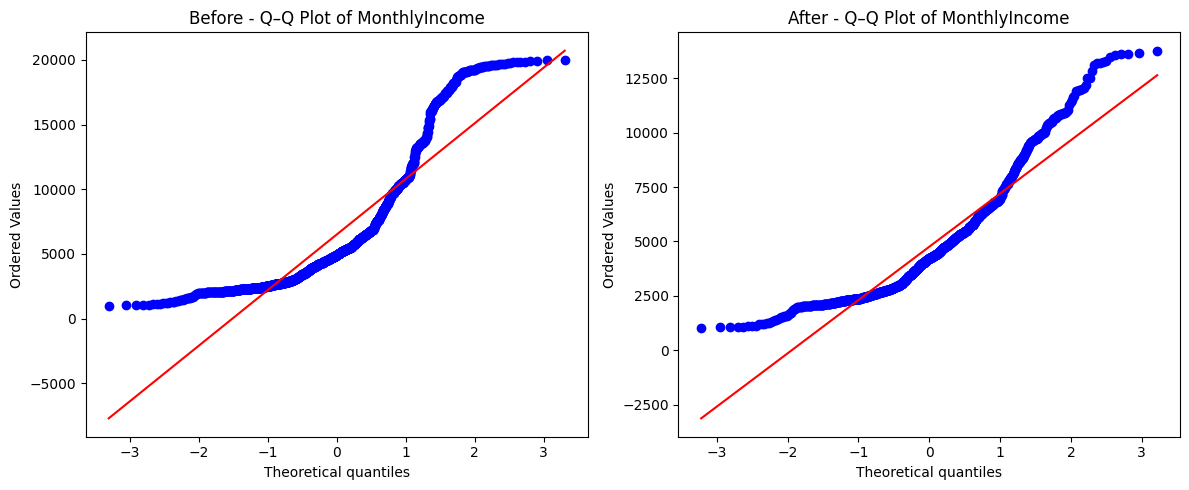

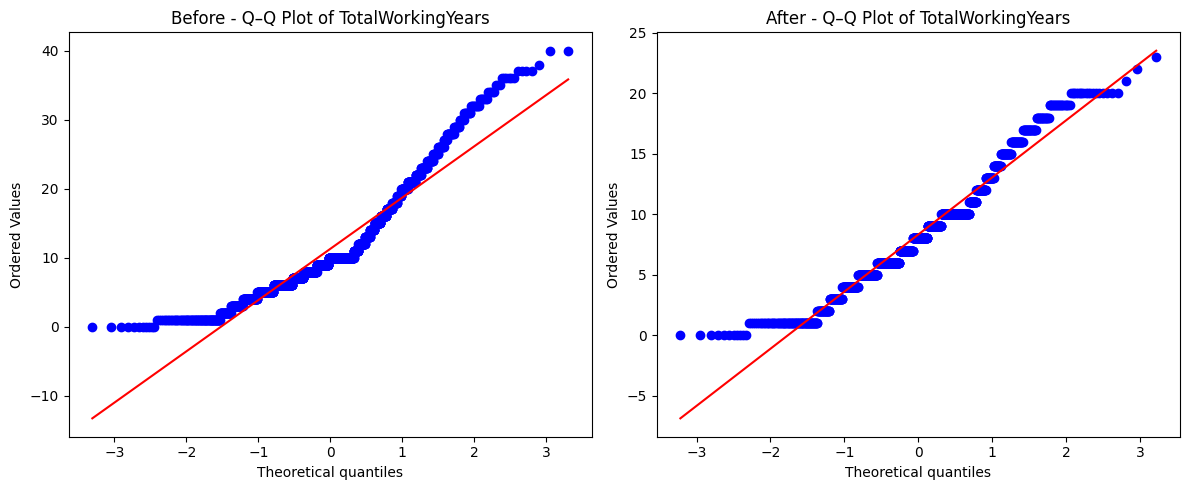

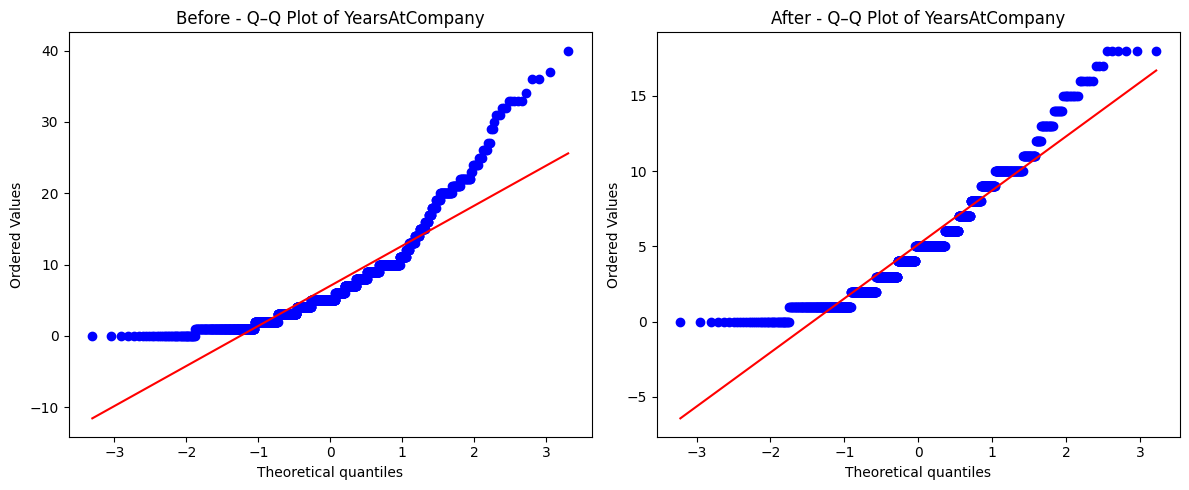

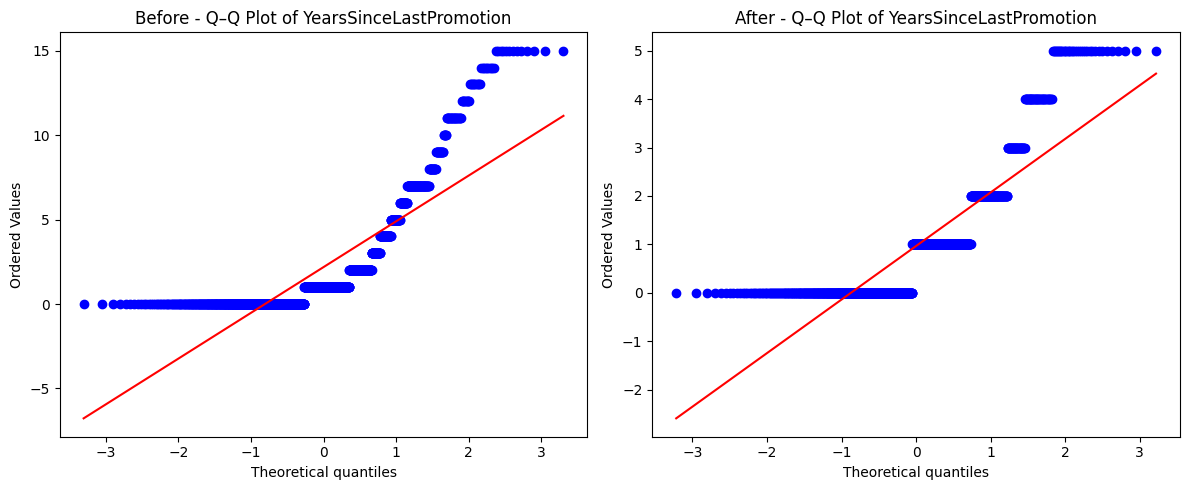

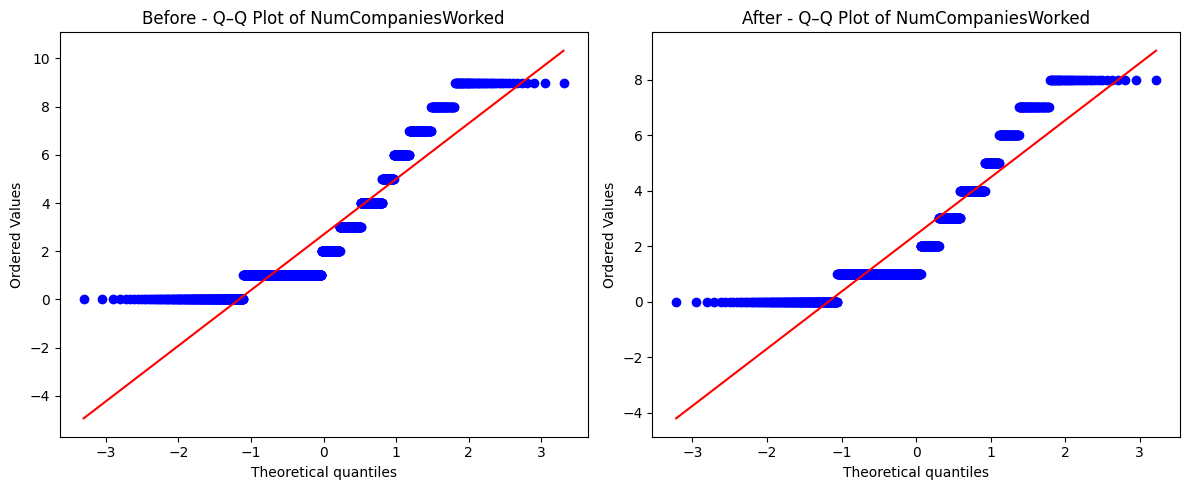

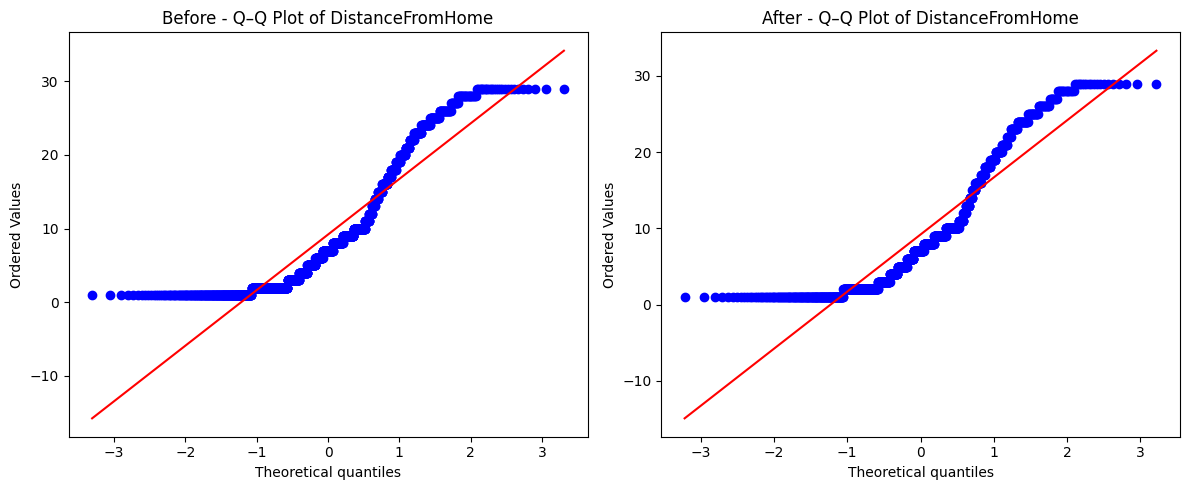

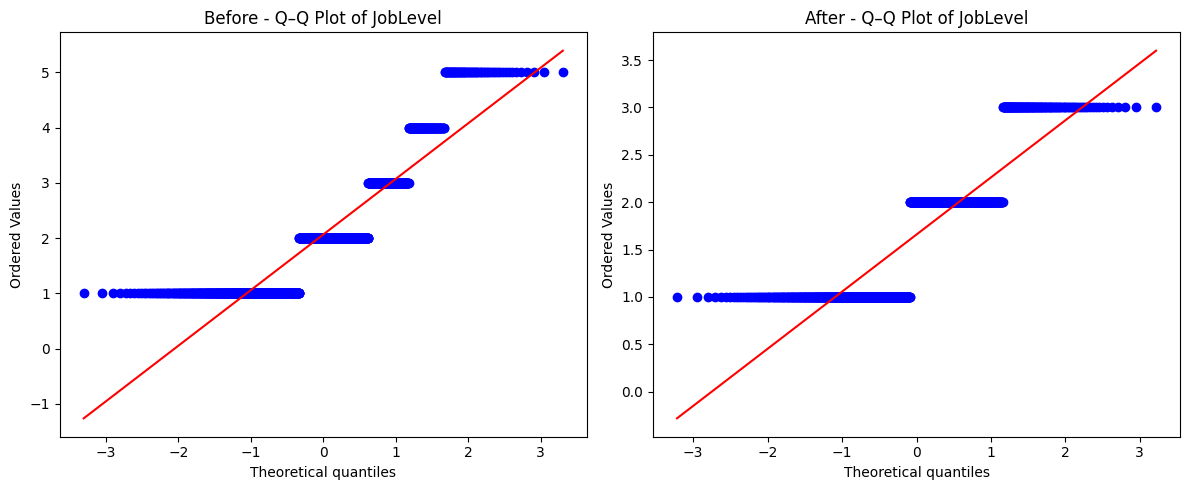

In [231]:
# Columns to apply outlier removal on (skewed numeric columns)
skewed_cols = [
    'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
    'YearsSinceLastPromotion', 'NumCompaniesWorked',
    'DistanceFromHome', 'JobLevel'
]

# Keep a copy of original df for plotting before/after
df_before = df.copy()

rows_before = len(df)
print(f"Rows before outlier removal: {rows_before}")

removed_per_column = {}

for col in skewed_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Identify outliers in current df
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    removed_per_column[col] = len(outliers)
    
    # Filter out outliers for this column
    df = df[(df[col] >= lower) & (df[col] <= upper)]

rows_after = len(df)
total_removed = rows_before - rows_after

print(f"Rows after outlier removal:  {rows_after}")
print(f"Total rows removed:          {total_removed}")
print("\nRows removed per column:")
for col, count in removed_per_column.items():
    print(f"  {col}: {count}")

# Q–Q plots to visually confirm improvement for each column
for col in skewed_cols:
    plt.figure(figsize=(12, 5))

    # Before outlier removal
    plt.subplot(1, 2, 1)
    stats.probplot(df_before[col], dist="norm", plot=plt)
    plt.title(f"Before - Q–Q Plot of {col}")

    # After outlier removal
    plt.subplot(1, 2, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"After - Q–Q Plot of {col}")

    plt.tight_layout()
    plt.show()


In [ ]:
# Columns to exclude (encoded categorical)
exclude_cols = [
    'Attrition', 'BusinessTravel', 'Department', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'
]

# Select numeric columns excluding the above
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
cols_to_check = [col for col in numeric_cols if col not in exclude_cols]

# Calculate skewness
skewness = df[cols_to_check].skew()

# Filter only non-normally distributed columns (e.g. skewness > 0.5 or < -0.5)
non_normal_cols = skewness[abs(skewness) > 0.5]

# Display
print(non_normal_cols.sort_values(ascending=False))


PerformanceRating          1.865419
YearsSinceLastPromotion    1.575657
MonthlyIncome              1.156104
YearsInCurrentRole         1.020502
YearsWithCurrManager       1.019689
NumCompaniesWorked         1.007968
StockOptionLevel           0.965243
DistanceFromHome           0.942284
YearsAtCompany             0.922293
PercentSalaryHike          0.741167
Age                        0.588126
JobLevel                   0.560479
TrainingTimesLastYear      0.546438
TotalWorkingYears          0.533347
JobInvolvement            -0.510959
WorkLifeBalance           -0.573585
dtype: float64


In [ ]:
# Define skewed continuous variables to filter
skewed_cols = [
    'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
    'YearsSinceLastPromotion', 'NumCompaniesWorked', 
    'DistanceFromHome', 'JobLevel'
]

rows_before = len(df)

# Apply IQR-based outlier removal only to selected columns
for col in skewed_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

rows_after = len(df)

print(f"Rows before outlier removal: {rows_before}")
print(f"Rows after outlier removal:  {rows_after}")
print(f"Total rows removed:         {rows_before - rows_after}")



Rows before outlier removal: 1074
Rows after outlier removal:  880
Total rows removed:         194


In [ ]:
# Columns to exclude (encoded categorical)
exclude_cols = [
    'Attrition', 'BusinessTravel', 'Department', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'
]

# Select numeric columns excluding the above
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
cols_to_check = [col for col in numeric_cols if col not in exclude_cols]

# Calculate skewness
skewness = df[cols_to_check].skew()

# Filter only non-normally distributed columns (e.g. skewness > 0.5 or < -0.5)
non_normal_cols = skewness[abs(skewness) > 0.5]

# Display
print(non_normal_cols.sort_values(ascending=False))


PerformanceRating          1.963741
YearsWithCurrManager       1.009770
NumCompaniesWorked         1.004271
StockOptionLevel           0.989117
YearsInCurrentRole         0.952619
DistanceFromHome           0.942699
MonthlyIncome              0.938240
PercentSalaryHike          0.753947
YearsSinceLastPromotion    0.746954
JobLevel                   0.708903
YearsAtCompany             0.664882
Age                        0.660873
TrainingTimesLastYear      0.542937
JobInvolvement            -0.510210
WorkLifeBalance           -0.539528
dtype: float64


In [ ]:
print(df.groupby('Age').size())

Age
18     8
19     9
20    11
21    13
22    16
23    14
24    23
25    25
26    31
27    40
28    44
29    56
30    39
31    46
32    44
33    43
34    44
35    55
36    43
37    31
38    33
39    18
40    24
41    23
42    21
43    15
44    19
45    17
46    10
47     9
48     5
49     8
50     7
51     5
52     4
53     3
54     4
55     3
56     4
57     3
58     4
59     4
60     2
dtype: int64


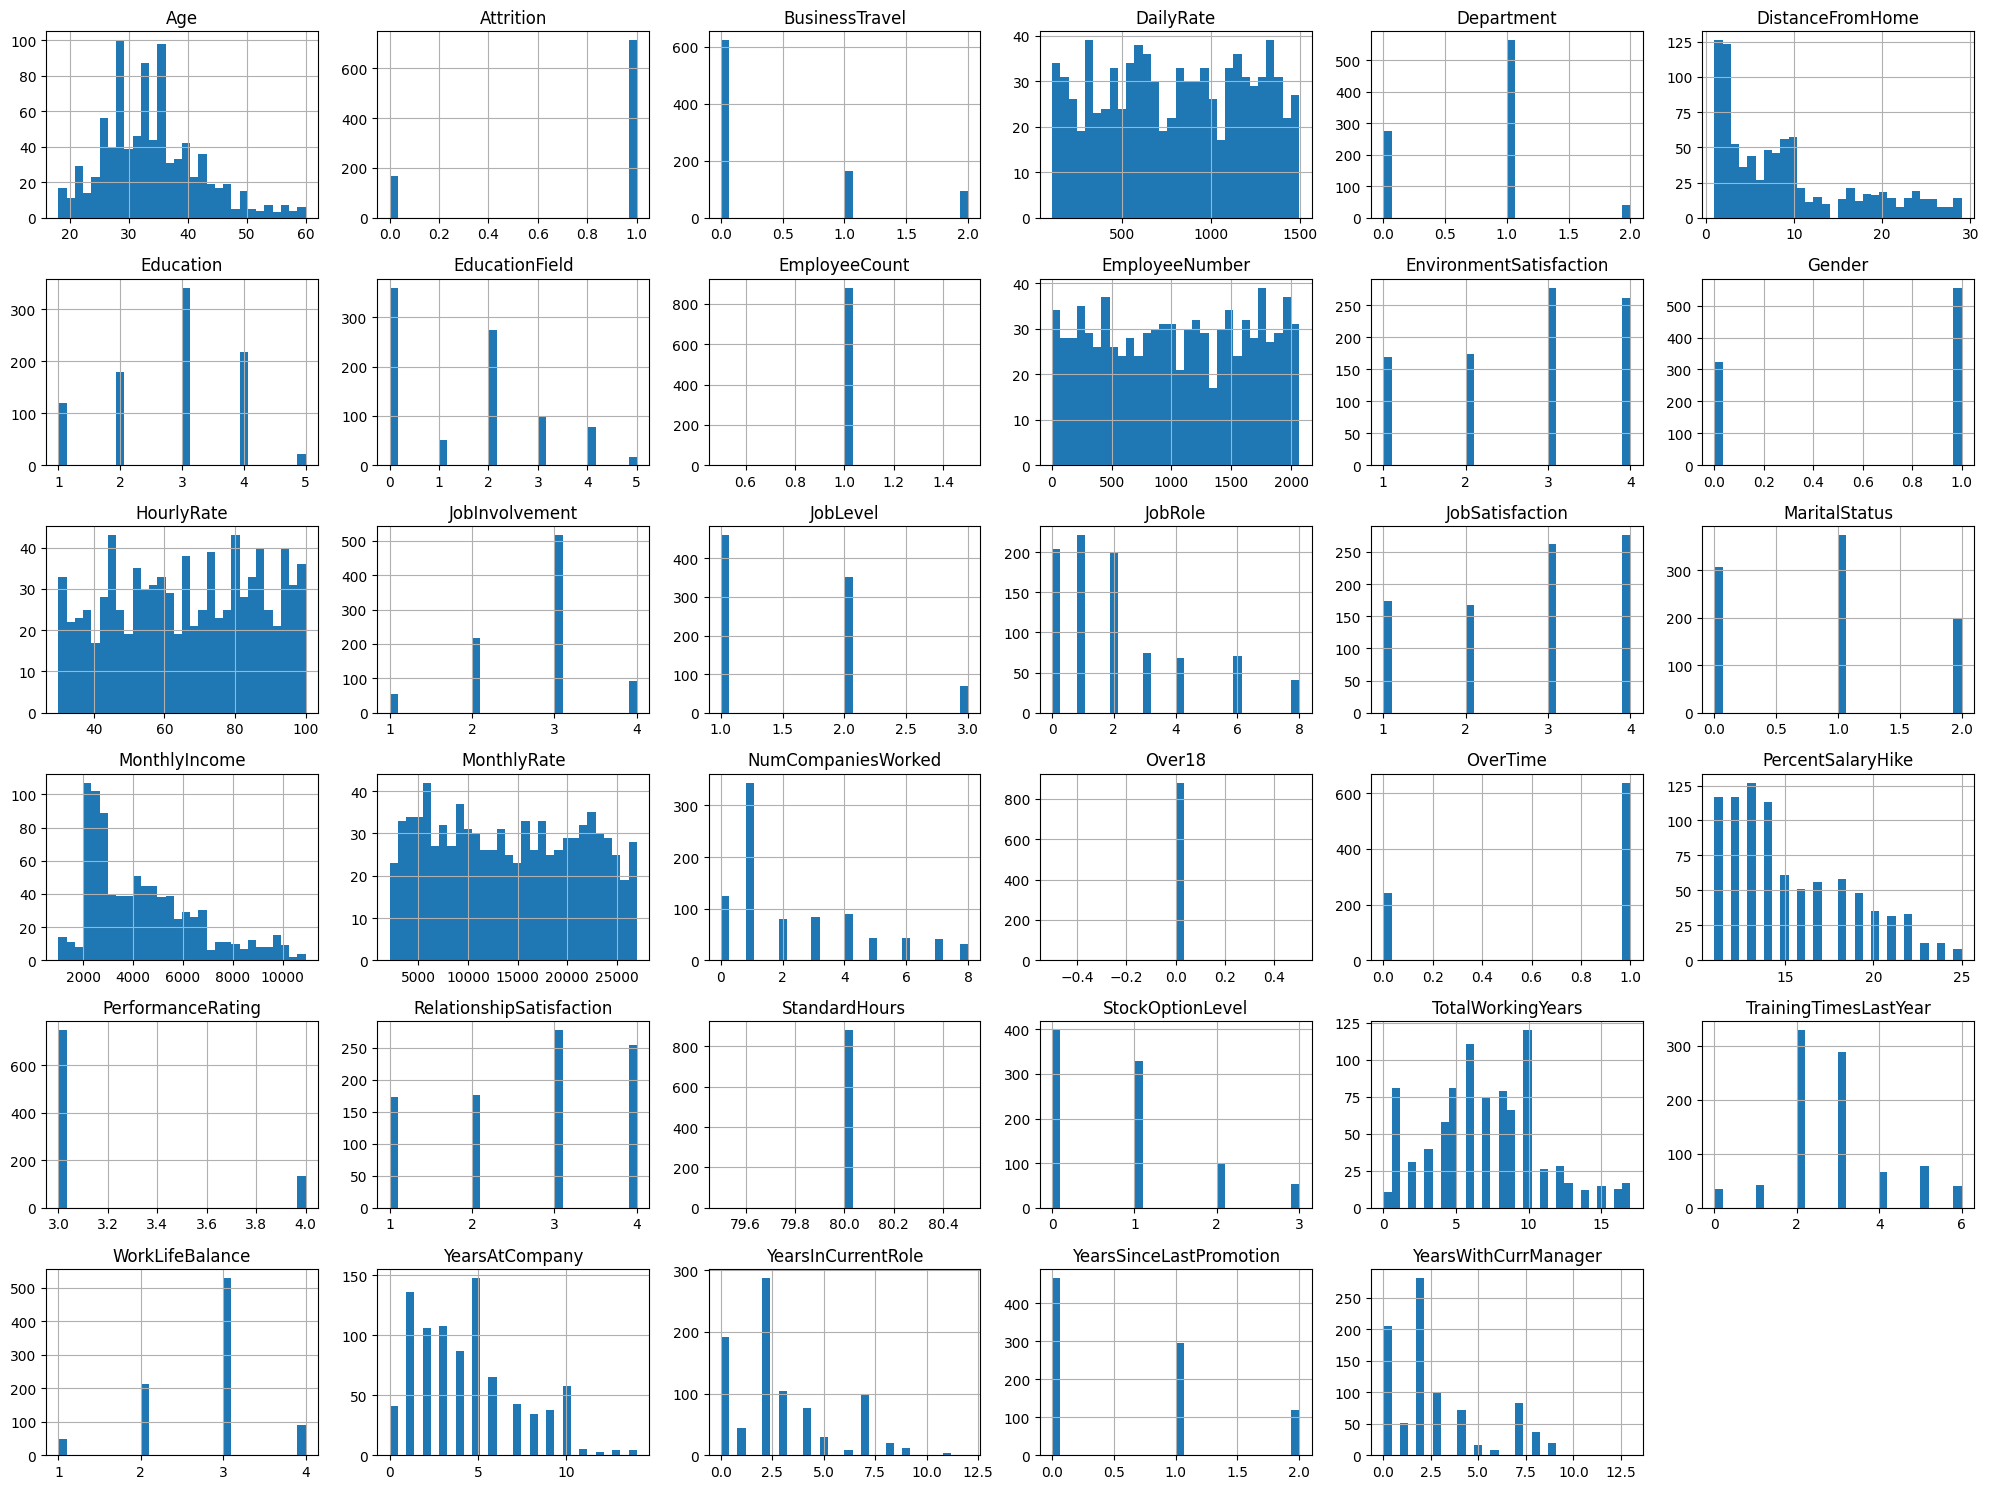

In [ ]:
df.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

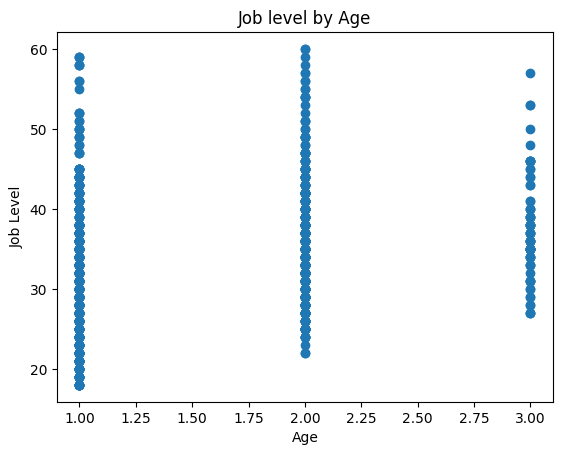

In [ ]:
plt.scatter(df['JobLevel'], df['Age'],  marker="o", picker=True)
plt.title(f'Job level by Age')
plt.xlabel('Age')
plt.ylabel('Job Level')
plt.show()